In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split



In [2]:
import pandas as pd

# Cargar el conjunto de datos desde el CSV
dataset = pd.read_csv('50_Startups.csv')



#### NORMALIZACION DE DATOS

In [3]:
def normalizationZscore(data):
    """Normalizacion de z-score"""

    mean = np.mean(data, axis=0)
    desviacionEstandar = np.std(data, axis=0)
    normalizationData = (mean - data) /desviacionEstandar
    return normalizationData

def normalizationMinMax(data):
    minData = np.min(data, axis=0)
    maxData = np.max(data, axis=0)
    normalizationData = ((data - minData)/(maxData - minData))
    return normalizationData

def normalizacioneSimple(data):
    maxData = np.max(data,axis=0)
    return (data / maxData)

In [4]:
# Crear un DataFrame
df = pd.DataFrame(dataset, columns=['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'])


#separando x y Y con data frame
x_data = df.iloc[:,:2]
y_data = df.iloc[:,-1:]

#convertir a array numpy
x_data = np.array(x_data)
y_data = np.array(y_data)

#normalizando x  y
x_normalizado = normalizationZscore (x_data)
y_normalizado = normalizationZscore ( y_data)
x_normalizado

array([[-2.01641149, -0.56075291],
       [-1.95586034, -1.08280658],
       [-1.75436374,  0.72825703],
       [-1.55478369,  0.09636463],
       [-1.5049372 ,  1.07991935],
       [-1.27980001,  0.77623907],
       [-1.34006641, -0.93214721],
       [-1.24505666, -0.87198001],
       [-1.03036886, -0.9869521 ],
       [-1.09181921,  0.45664025],
       [-0.62039825,  0.38759909],
       [-0.59308542,  1.0655396 ],
       [-0.44325987, -0.21544906],
       [-0.4020776 , -0.51017895],
       [-1.01718075, -1.26919939],
       [-0.89791312, -0.04586785],
       [-0.0944412 , -0.00911842],
       [-0.46072013, -0.85566632],
       [-0.39672494,  0.25846537],
       [-0.27944165, -1.15983657],
       [-0.05572609,  0.26958765],
       [-0.1027236 , -1.16918609],
       [-0.00600658, -0.05184956],
       [ 0.13620072,  0.56221127],
       [-0.0731146 ,  0.79546917],
       [ 0.19931169, -0.65648914],
       [-0.0353702 , -0.82171792],
       [ 0.03551899, -0.23506854],
       [ 0.16879272,

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_normalizado, y_normalizado, test_size=0.3, random_state=42)

print(x_train[:,1:2])
print(np.shape(y_train))


[[-0.93214721]
 [ 1.32079581]
 [ 0.19932174]
 [-0.50772188]
 [-0.04586785]
 [ 0.45664025]
 [-0.00911842]
 [ 0.79546917]
 [-1.31053525]
 [-1.13055391]
 [-0.56075291]
 [-1.20641936]
 [-0.23506854]
 [ 0.65932403]
 [ 0.77623907]
 [-1.14245677]
 [ 1.0655396 ]
 [-0.20592469]
 [-1.08280658]
 [-1.16918609]
 [ 0.72825703]
 [-0.21768152]
 [ 1.30865753]
 [ 0.56221127]
 [ 0.10090022]
 [ 0.38759909]
 [-0.05184956]
 [ 0.25846537]
 [ 0.15722551]
 [ 0.26958765]
 [-0.87198001]
 [ 0.90693753]
 [-1.26919939]
 [-2.2101405 ]
 [ 1.99727037]]
(35, 1)


In [6]:

class LinearRegressionMultivarible:

    def __init__(self,numberInpedent):

        """
        seed ---> generamos la semilla para los resultados sean estaticos
        numberInpedent -----> es la cantidad de valores independientes
        """
        
        #np.random.seed(2001)
        self.w = np.random.rand(numberInpedent).reshape(-1,1)
        self.b = np.random.rand()

        # print(f'self.w : {self.w} y su shape es {np.shape(self.w)}')

    def H(self,x):

        """
        x ---> un matrix de la variables inpedendiantes
        w ---> como es w un matrix de una solo fila y n columnas podemos multipliar directament 
                con el variables independiente que le corresponde
        """
        predictor = np.dot(x, self.w) + self.b
        # print(f' el predictor es h es {predictor}')
        
        return predictor
    

    def Loos(self, x , y):
        """
        x   -------> el matrix de los variables independientes
        y   -------> es el y real y es una matrix de las salidas
        y_plane_predictor -------> nos devuelve la matrix de predecidos
        loss ----> nos devuelve el resultado escalar es decir el MSE
        """
        
        y_plane_predictor = self.H(x)
        loss = (np.linalg.norm(y - y_plane_predictor)**2) / (2*len(y))
        
        print(f'El loss es {loss}')
        return loss, y_plane_predictor
    
    def Derivates(self, x, y, y_pred):
        """
        dw  ----> devuelve una matrix de los coeficientes de x
        db  ----> devuelve la suma del baias """
        
        dw = np.dot(x.T,(y_pred - y)) / len(y)
        db = np.sum(y_pred - y) /len(y)

        return dw,db
    
    def change_params (self, dw,db,alpha):
        self.w = self.w.reshape(-1, 1) 
    
        self.w = self.w - alpha*dw
        self.b = self.b - alpha*db

        return self.w, self.b
    
    def train(self,x,y,alpha,epochs):
        error_list = []
        time_stamp = []
        params = []

        print("Starting train")
        for i in range(epochs):
            loss , y_predic = self.Loos(x,y)
            error_list.append(loss)
            time_stamp.append(i)
            dw,db = self.Derivates(x,y,y_predic)
            self.change_params(dw,db,alpha)
            params.append([dw,db])

            if (i % 500 == 0):
                print(f'Loos en la epoca {i} es :{y_predic}')
                self.plot_plane(x[:,:1],x[:,1:2],y_predic)

        return time_stamp, error_list, params, y_predic
    

    def test(self,x_test):
        y_test_predic = self.H(x_test)

        loss = (np.linalg.norm(y_test - y_test_predic)**2) / (2*len(y_test_predic))

        return loss , y_test_predic
    

    def plot_error(self, time, loss):
        plt.plot(time,loss)
        plt.title("Loss in the time")
        plt.xlabel("time")
        plt.ylabel("Loss")
        plt.show()

    def plot_line(self,x,y,y_pre):
        plt.plot(x,y,'*')
        plt.plot(x,y_pre)
        plt.show()

    def plot_plane(self,xx,zz,yy):
        
        #creaate figure 3d
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')

        #grafica la figura en 3d
        ax.scatter(xx, zz, yy.reshape(xx.shape), c='r', marker='o')



        #configuracion
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        #crea la malla 
        X1_mesh, X2_mesh = np.meshgrid(xx, zz)
        y_pred_mesh = self.b + self.w[0] * X1_mesh + self.w[1] * X2_mesh

        ax.plot_surface(X1_mesh, X2_mesh, y_pred_mesh, alpha=0.5, cmap='viridis' )

        # Mostrar el gráfico
        plt.show()

    def accuracy(self, y_true, y_predic, threshold=0.3):
            """Calcula la precisión para datos de regresión. Este método utiliza un umbral,
            lo que significa que una predicción se considera correcta si cae dentro de un cierto rango."""
            correct_predictions = sum(abs(y_true - y_predic) <= threshold)
            total_predictions = len(y_predic)
            result_accuracy = correct_predictions / total_predictions
            return result_accuracy
    


Starting train
El loss es 0.3230370354663429
Loos en la epoca 0 es :[[-1.145181  ]
 [ 1.40476082]
 [ 0.97121425]
 [ 0.53596879]
 [-0.37162337]
 [-0.14487959]
 [ 0.03457103]
 [ 0.5557224 ]
 [-0.46072495]
 [-0.50067447]
 [-1.23158947]
 [-0.14032959]
 [-0.04700254]
 [ 0.69523479]
 [-0.03147711]
 [-0.55509762]
 [ 0.47947615]
 [ 0.42706572]
 [-1.53429027]
 [-0.70612826]
 [-0.28808025]
 [ 0.55757625]
 [ 1.20703107]
 [ 0.50732049]
 [ 0.62097883]
 [ 0.03590521]
 [ 0.04957187]
 [ 0.0604736 ]
 [ 0.95827329]
 [ 0.23002353]
 [-1.06169692]
 [ 1.18650872]
 [-1.20538574]
 [-1.23785505]
 [ 1.91474508]]


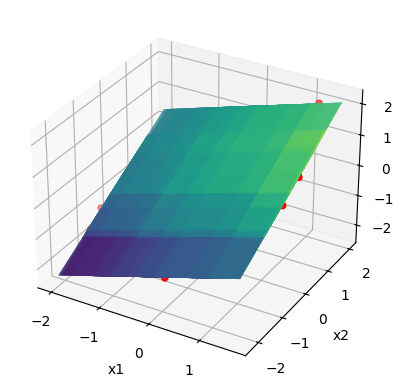

El loss es 0.3184966779401251
El loss es 0.31402666143218344
El loss es 0.3096258827734485
El loss es 0.30529325637895294
El loss es 0.30102771396162953
El loss es 0.29682820425089035
El loss es 0.292693692715904
El loss es 0.28862316129349086
El loss es 0.28461560812055475
El loss es 0.28067004727097605
El loss es 0.27678550849688693
El loss es 0.2729610369742556
El loss es 0.2691956930527034
El loss es 0.2654885520094845
El loss es 0.2618387038075552
El loss es 0.25824525285766303
El loss es 0.25470731778438793
El loss es 0.25122403119606584
El loss es 0.2477945394585311
El loss es 0.24441800247260886
El loss es 0.24109359345529785
El loss es 0.2378204987245757
El loss es 0.23459791748776887
El loss es 0.23142506163342488
El loss es 0.2283011555266269
El loss es 0.2252254358076919
El loss es 0.22219715119419664
El loss es 0.21921556228627276
El loss es 0.2162799413751159
El loss es 0.2133895722546552
El loss es 0.21054375003632872
El loss es 0.20774178096691193
El loss es 0.204982982

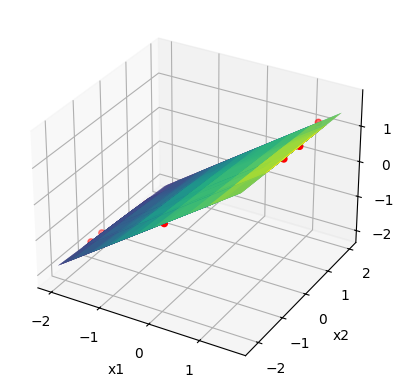

El loss es 0.027448841445585
El loss es 0.02744667944663109
El loss es 0.027444549927143867
El loss es 0.027442452398890763
El loss es 0.02744038638098456
El loss es 0.027438351399772704
El loss es 0.027436346988728374
El loss es 0.02743437268834315
El loss es 0.027432428046021293
El loss es 0.027430512615975684
El loss es 0.02742862595912521
El loss es 0.0274267676429938
El loss es 0.027424937241610974
El loss es 0.027423134335413855
El loss es 0.02742135851115068
El loss es 0.027419609361785748
El loss es 0.027417886486405838
El loss es 0.027416189490128032
El loss es 0.02741451798400882
El loss es 0.027412871584954812
El loss es 0.02741124991563453
El loss es 0.02740965260439172
El loss es 0.02740807928515987
El loss es 0.02740652959737809
El loss es 0.02740500318590816
El loss es 0.027403499700952967
El loss es 0.027402018797976015
El loss es 0.027400560137622296
El loss es 0.027399123385640264
El loss es 0.02739770821280495
El loss es 0.027396314294842416
El loss es 0.027394941312

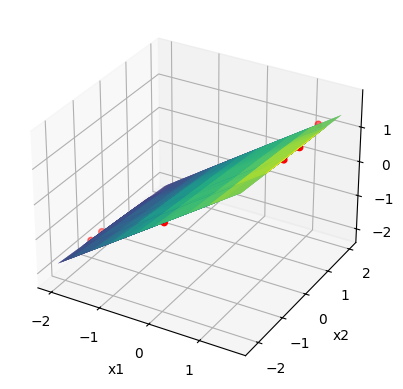

El loss es 0.027304939517038353
El loss es 0.027304938391172588
El loss es 0.027304937282194977
El loss es 0.027304936189852188
El loss es 0.02730493511389469
El loss es 0.02730493405407669
El loss es 0.027304933010156095
El loss es 0.027304931981894435
El loss es 0.02730493096905681
El loss es 0.02730492997141184
El loss es 0.027304928988731627
El loss es 0.0273049280207917
El loss es 0.02730492706737096
El loss es 0.02730492612825158
El loss es 0.027304925203219043
El loss es 0.02730492429206205
El loss es 0.027304923394572453
El loss es 0.027304922510545237
El loss es 0.02730492163977845
El loss es 0.02730492078207318
El loss es 0.027304919937233513
El loss es 0.02730491910506643
El loss es 0.027304918285381858
El loss es 0.027304917477992564
El loss es 0.027304916682714085
El loss es 0.027304915899364766
El loss es 0.027304915127765672
El loss es 0.027304914367740525
El loss es 0.027304913619115734
El loss es 0.027304912881720263
El loss es 0.02730491215538569
El loss es 0.02730491

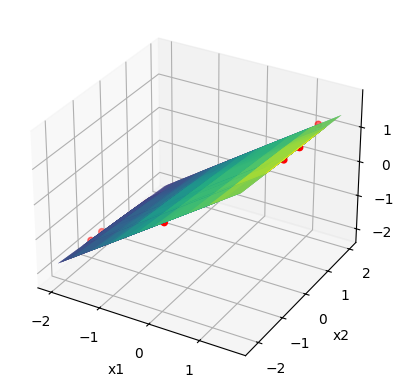

El loss es 0.02730486449737142
El loss es 0.02730486449678287
El loss es 0.027304864496203143
El loss es 0.027304864495632127
El loss es 0.027304864495069654
El loss es 0.027304864494515635
El loss es 0.02730486449396991
El loss es 0.027304864493432373
El loss es 0.02730486449290291
El loss es 0.02730486449238138
El loss es 0.027304864491867673
El loss es 0.027304864491361675
El loss es 0.027304864490863254
El loss es 0.027304864490372324
El loss es 0.027304864489888763
El loss es 0.027304864489412436
El loss es 0.027304864488943262
El loss es 0.02730486448848112
El loss es 0.02730486448802592
El loss es 0.027304864487577532
El loss es 0.027304864487135885
El loss es 0.02730486448670085
El loss es 0.02730486448627235
El loss es 0.02730486448585027
El loss es 0.027304864485434514
El loss es 0.027304864485025015
El loss es 0.027304864484621643
El loss es 0.027304864484224325
El loss es 0.02730486448383296
El loss es 0.02730486448344747
El loss es 0.027304864483067758
El loss es 0.0273048

In [7]:
LRM =  LinearRegressionMultivarible(2)

time_stamp, error_list, params, y_predic = LRM.train(x_train, y_train, alpha=0.01, epochs=2000)


Loss print vs epochs graph :


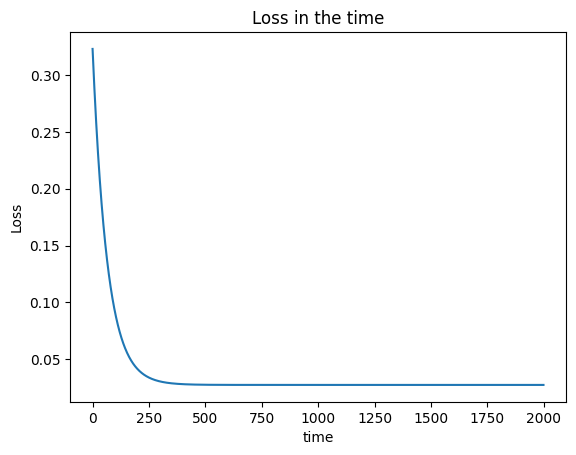

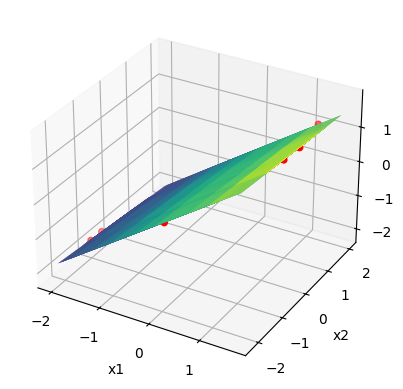

In [8]:
# display for training 

print("Loss print vs epochs graph :") 

LRM.plot_error(time_stamp,error_list) # # Display how the error decreases over epochs

LRM.plot_plane (x_train[:,:1],x_train[:,1:2] , LRM.H(x_train))

### Testing

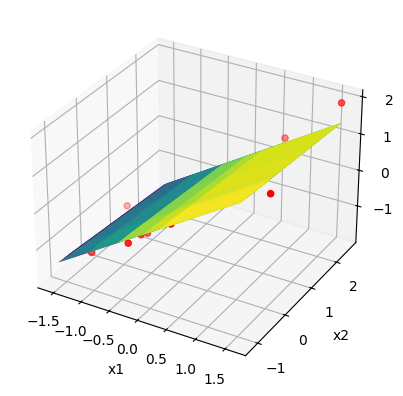

In [9]:
#testing
loss, y_test_predic = LRM.test(x_test)


#Display the line plot for the test set
LRM.plot_plane(x_test[:,:1],x_test[:,1:2] , y_test)

### Metrics 

In [10]:
#accuaracy del entrenamiento 
accuracy_train = LRM.accuracy(y_train,y_predic)
print(f'The acurracy train : {accuracy_train}')

#acucuracy the testing
accuracy_test = LRM.accuracy (y_test,y_test_predic)
print(f'The accuracy test : {accuracy_test}')

The acurracy train : [0.85714286]
The accuracy test : [0.8]


### PROBANDO EL SEGUNDO 

In [11]:

dataWorld = pd.read_csv('WorldHappinessReport.csv')
dataWorld

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [12]:
## separacion de datos
#separando x y Y con data frame
x_happiness = dataWorld.iloc[:,4:6]
y_happiness = dataWorld.iloc[:,6:7]

#convertir a array numpy
x_happiness_array = np.array(x_happiness)
y_happiness_array = np.array(y_happiness)

# #normalizando x  y
# x_normalizado = normalizationZscore (x_data)
# y_normalizado = normalizationZscore ( y_data)
# x_normalizado
x_Lower = x_happiness_array[:,0:1]
x_Upper = x_happiness_array[:,1:2]



In [13]:
y_happiness_array

array([[1.44178],
       [1.52733],
       [1.42666],
       [1.57744],
       [1.40598],
       [1.44015],
       [1.46468],
       [1.36066],
       [1.44443],
       [1.45181],
       [1.33766],
       [1.45038],
       [1.50796],
       [1.06879],
       [1.35943],
       [1.44787],
       [1.08754],
       [1.42539],
       [1.48341],
       [1.69752],
       [1.11508],
       [1.64555],
       [1.40283],
       [1.2167 ],
       [1.18306],
       [1.15137],
       [1.30915],
       [1.57352],
       [1.18157],
       [1.30782],
       [1.03032],
       [1.39488],
       [1.0893 ],
       [1.48953],
       [1.39729],
       [1.82427],
       [1.34253],
       [1.05266],
       [0.83454],
       [1.09686],
       [1.61714],
       [1.44024],
       [1.32572],
       [1.13367],
       [1.27973],
       [0.8737 ],
       [1.25142],
       [0.69384],
       [0.73591],
       [1.35495],
       [0.97306],
       [0.87616],
       [1.38007],
       [1.22943],
       [0.69177],
       [1.

Starting train
El loss es 1.3524390725783206
Loos en la epoca 0 es :[[3.43984976]
 [3.43671481]
 [3.45552213]
 [3.43120887]
 [3.39269941]
 [3.39080093]
 [3.36071076]
 [3.36247515]
 [3.35440874]
 [3.34339686]
 [3.33461305]
 [3.27571013]
 [3.27212314]
 [3.26619728]
 [3.28643378]
 [3.22213811]
 [3.20828876]
 [3.19661488]
 [3.18839391]
 [3.172681  ]
 [3.14257638]
 [3.11828079]
 [3.11586324]
 [3.11074229]
 [3.11164637]
 [3.08828697]
 [3.06395646]
 [3.05405861]
 [3.045164  ]
 [3.01935493]
 [3.02106392]
 [3.01577958]
 [3.01338531]
 [2.97815091]
 [2.97358397]
 [3.00315828]
 [2.96598124]
 [2.97748611]
 [2.96051625]
 [2.95962703]
 [2.91921588]
 [2.91191062]
 [2.92397271]
 [2.86252939]
 [2.85272187]
 [2.85345974]
 [2.82342497]
 [2.82598263]
 [2.81785198]
 [2.81072457]
 [2.81462951]
 [2.84452178]
 [2.78583122]
 [2.78780557]
 [2.77679369]
 [2.75827824]
 [2.75452504]
 [2.75503248]
 [2.74820255]
 [2.74376688]
 [2.73927582]
 [2.732201  ]
 [2.72691666]
 [2.7195006 ]
 [2.68022998]
 [2.69213149]
 [2.6959

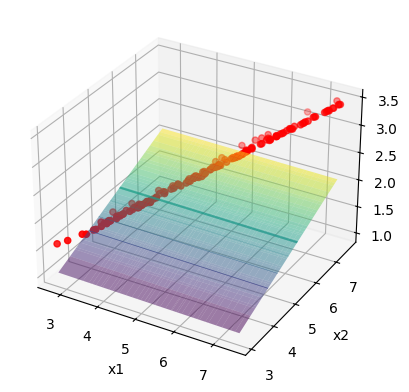

El loss es 0.2436704636266163
El loss es 0.07933102615261219
El loss es 0.054960966664529085
El loss es 0.05133511673431985
El loss es 0.0507836799234054
El loss es 0.050687899543227055
El loss es 0.05065966208165006
El loss es 0.05064144706617601
El loss es 0.05062472964988604
El loss es 0.05060824639502816
El loss es 0.050591810042853215
El loss es 0.05057539283000429
El loss es 0.05055899063118892
El loss es 0.05054260282440922
El loss es 0.05052622930688324
El loss es 0.050509870052788806
El loss es 0.05049352504771876
El loss es 0.05047719427896695
El loss es 0.05046087773408856
El loss es 0.05044457540068668
El loss es 0.05042828726638068
El loss es 0.05041201331880153
El loss es 0.05039575354559114
El loss es 0.050379507934402136
El loss es 0.05036327647289797
El loss es 0.050347059148752794
El loss es 0.050330855949651504
El loss es 0.05031466686328976
El loss es 0.05029849187737387
El loss es 0.05028233097962093
El loss es 0.0502661841577587
El loss es 0.050250051399525625
El 

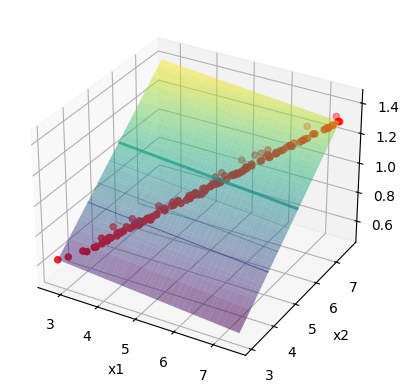

El loss es 0.044041784741357656
El loss es 0.044031073177091415
El loss es 0.04402037094179365
El loss es 0.04400967802733795
El loss es 0.04399899442560486
El loss es 0.04398832012848214
El loss es 0.04397765512786449
El loss es 0.04396699941565378
El loss es 0.043956352983758856
El loss es 0.04394571582409565
El loss es 0.04393508792858713
El loss es 0.043924469289163284
El loss es 0.04391385989776116
El loss es 0.04390325974632479
El loss es 0.043892668826805294
El loss es 0.04388208713116069
El loss es 0.0438715146513561
El loss es 0.04386095137936364
El loss es 0.04385039730716233
El loss es 0.04383985242673829
El loss es 0.04382931673008455
El loss es 0.04381879020920114
El loss es 0.043808272856095024
El loss es 0.04379776466278021
El loss es 0.04378726562127757
El loss es 0.043776775723615005
El loss es 0.043766294961827296
El loss es 0.04375582332795617
El loss es 0.043745360814050366
El loss es 0.04373490741216541
El loss es 0.043724463114363905
El loss es 0.04371402791271523

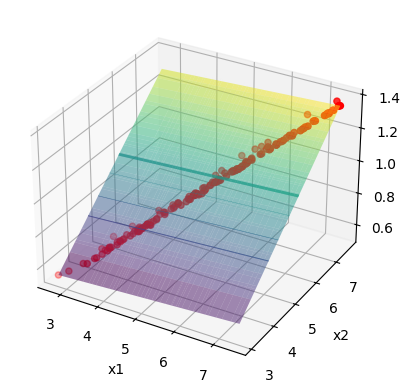

El loss es 0.039698251759970264
El loss es 0.03969132291187949
El loss es 0.0396844000976445
El loss es 0.03967748331200921
El loss es 0.03967057254972219
El loss es 0.03966366780553655
El loss es 0.03965676907420989
El loss es 0.03964987635050451
El loss es 0.03964298962918718
El loss es 0.039636108905029284
El loss es 0.0396292341728067
El loss es 0.039622365427299897
El loss es 0.0396155026632939
El loss es 0.03960864587557825
El loss es 0.039601795058947065
El loss es 0.03959495020819893
El loss es 0.03958811131813703
El loss es 0.03958127838356905
El loss es 0.03957445139930716
El loss es 0.03956763036016813
El loss es 0.039560815260973194
El loss es 0.039554006096548106
El loss es 0.03954720286172309
El loss es 0.03954040555133298
El loss es 0.039533614160216966
El loss es 0.03952682868321888
El loss es 0.03952004911518688
El loss es 0.03951327545097378
El loss es 0.03950650768543679
El loss es 0.03949974581343759
El loss es 0.039492989829842375
El loss es 0.03948623972952177
El 

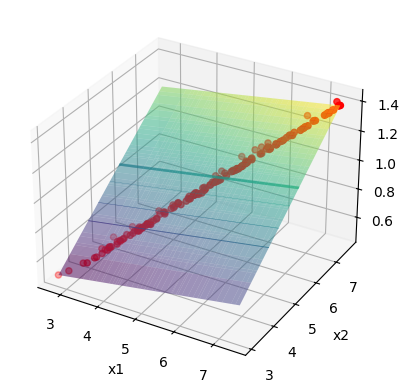

El loss es 0.03688853796208411
El loss es 0.03688405572939044
El loss es 0.03687957739932996
El loss es 0.036875102968503194
El loss es 0.036870632433513545
El loss es 0.036866165790967416
El loss es 0.03686170303747414
El loss es 0.03685724416964605
El loss es 0.03685278918409838
El loss es 0.036848338077449326
El loss es 0.036843890846320074
El loss es 0.03683944748733467
El loss es 0.036835007997120174
El loss es 0.03683057237230657
El loss es 0.03682614060952672
El loss es 0.03682171270541651
El loss es 0.036817288656614676
El loss es 0.03681286845976294
El loss es 0.03680845211150592
El loss es 0.03680403960849117
El loss es 0.03679963094736913
El loss es 0.036795226124793225
El loss es 0.036790825137419735
El loss es 0.03678642798190784
El loss es 0.036782034654919714
El loss es 0.036777645153120375
El loss es 0.03677325947317775
El loss es 0.03676887761176268
El loss es 0.03676449956554891
El loss es 0.036760125331213075
El loss es 0.036755754905434694
El loss es 0.0367513882848

In [14]:
LRM2 =  LinearRegressionMultivarible(2)

time_stamp_, error_list_, params, y_predichoo = LRM2.train(x_happiness_array, y_happiness_array, alpha=0.01, epochs=2000)

In [15]:
def plot_3d(xx,zz,yy):
    
    #creaate figure 3d
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    #grafica la figura en 3d
    ax.scatter(xx, zz, yy.reshape(xx.shape), c='r', marker=f'*')



    #configuracion
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    #crea la malla 
    # X1_mesh, X2_mesh = np.meshgrid(xx, zz)
    # y_pred_mesh = self.b + self.w[0] * X1_mesh + self.w[1] * X2_mesh

    # ax.plot_surface(X1_mesh, X2_mesh, y_pred_mesh, alpha=0.5, cmap='viridis')

    # Mostrar el gráfico
    plt.show()

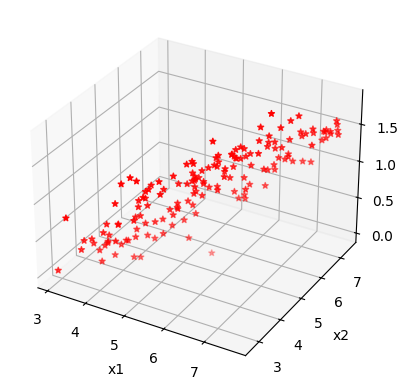

In [16]:
plot_3d(x_Upper,x_Lower,y_happiness_array)